In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('long_format_annual_surface_temp.csv', parse_dates = ['Year'], index_col = 'Year')
df.index = df.index.str.replace('F', '')
df

,Country,ISO2,Temperature
Year,,,
1961,"Afghanistan, Islamic Rep. of",AF,-0.113
1961,Albania,AL,0.627
1961,Algeria,DZ,0.164
1961,American Samoa,AS,0.079
1961,"Andorra, Principality of",AD,0.736
...,...,...,...
2022,West Bank and Gaza,PS,1.074
2022,Western Sahara,EH,1.970
2022,World,ZM,1.394


In [6]:
br = df.loc[df['Country']  == 'Brazil']
br = br.drop(['Country', 'ISO2'], axis = 1)
br

,Temperature
Year,
1961,0.167
1962,-0.184
1963,0.158
1964,-0.213
1965,-0.075
...,...
2018,1.148
2019,1.517
2020,1.477


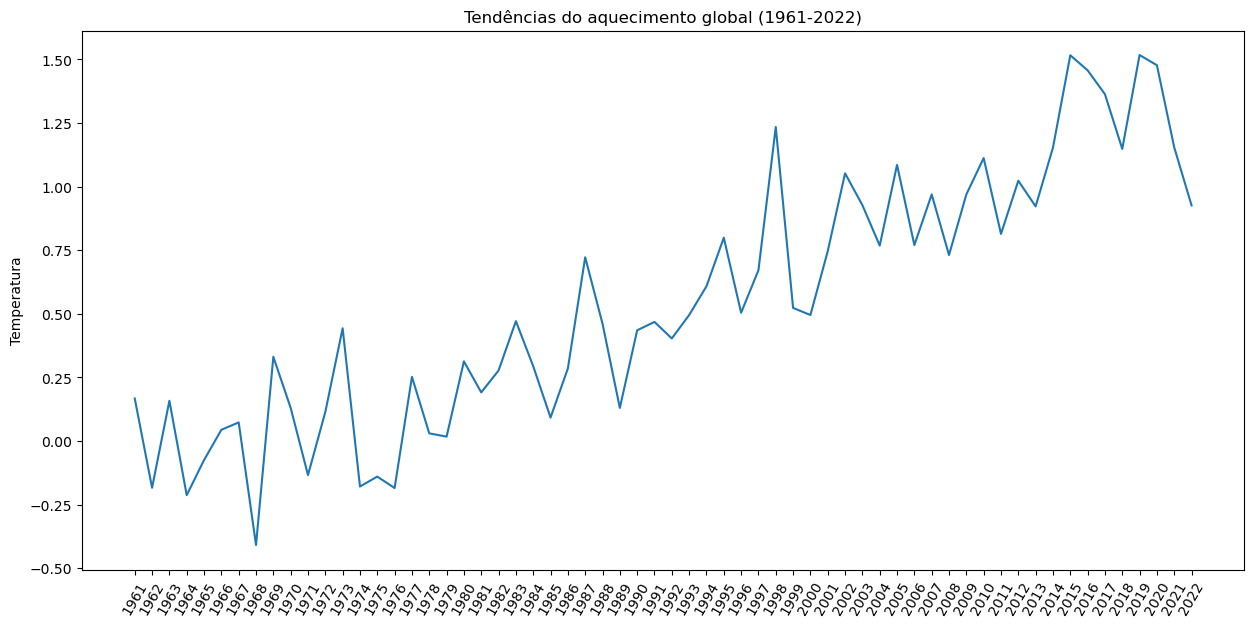

In [7]:
import matplotlib.pyplot as plt

x = br.index
y = br['Temperature']

plt.figure(figsize=(15,7))
plt.plot(x, y)
plt.title('Tendências do aquecimento global (1961-2022)')
plt.ylabel('Temperatura')
plt.xticks(rotation=60)

plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

y = df['Temperature']
def teste_estacionariedade(y):
    resultado = adfuller(y, autolag = 'AIC')
    print('Resultado do Teste Dickey-Fuller:')
    print('Estatística do Teste:', resultado[0])
    print('Valor do p:', resultado[1])
    print('Valores Críticos:')
    for key, value in resultado[4].items():
        print(f'{key}: {value}')
        
# Chamando a função de teste de estacionariedade
teste_estacionariedade(y)

Resultado do Teste Dickey-Fuller:
Estatística do Teste: -2.534834024826552
Valor do p: 0.10722720142440106
Valores Críticos:
1%: -3.430934887924842
5%: -2.861798488681978
10%: -2.5669075884096246


In [17]:
import numpy as np


optimal_n = None
best_mse = None

# Convertendo a coluna '#Passengers' do DataFrame para um array de float32
db = br[['Temperature']].values.astype('float32')

# Inicialização de um array para armazenar os resultados médios de MSE
# para todas as possíveis configurações de n
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))

# Loop através de várias configurações de n para calcular os MSEs
for n in range(3, int(len(db) / 2 + 1)):
    # Inicialização de um array para armazenar os valores de MSE para a configuração atual de n
    mean_for_n = np.zeros(len(db) - n)
    
    # Loop através dos dados para calcular os valores de MSE
    for i in range(0, len(db) - n):
        # Cálculo do MSE para a configuração atual de n e posição i
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i+n][0], 2)
    
    # Armazenamento da média dos MSEs calculados para a configuração atual de n
    mean_results_for_all_possible_n_values[n-3] = np.mean(mean_for_n)

# Encontrando o valor ótimo de n com base no índice do menor valor de MSE
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3

# Encontrando o menor valor de MSE
best_mse = np.min(mean_results_for_all_possible_n_values)

print('Melhor MSE =', best_mse)
print('Ótimo n =', optimal_n)

Melhor MSE = 0.05163463723428579
Ótimo n = 4


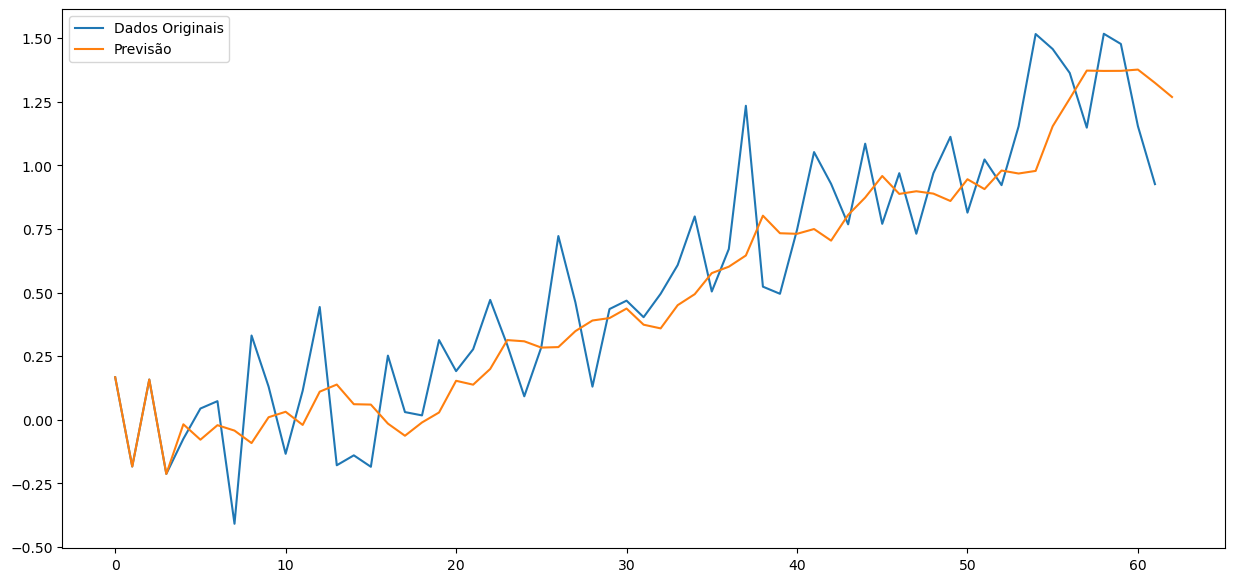

In [16]:
plt.figure(figsize=(15,7))
pred = np.concatenate((db[:optimal_n, 0], np.convolve(db[:, 0], np.ones(optimal_n)/optimal_n, mode='valid')), axis=None)

# Plotando os dados originais e as previsões
plt.plot(db[:,0], label='Dados Originais')
plt.plot(pred, label='Previsão')
plt.legend()
plt.show()